In [1]:
# Set the font family to Times New Roman
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 15

mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'

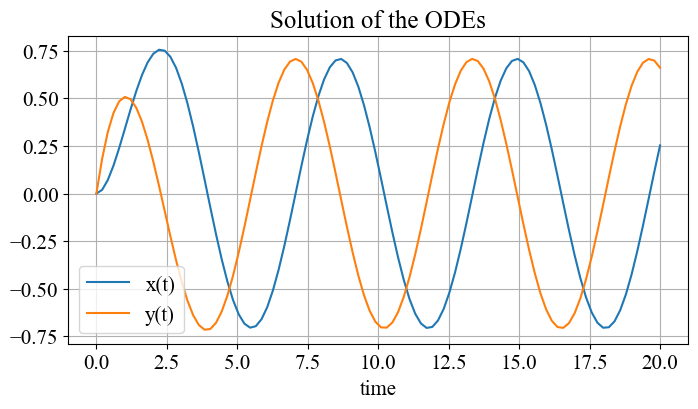

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# define the system
def system(state, t):
    x, y = state
    dxdt = -x + np.sin(t)
    dydt = -y + np.cos(t)
    return [dxdt, dydt]

# initial condition
state0 = [0, 0]

# time points
t = np.linspace(0, 20, 100)

# solve ODE
solution = odeint(system, state0, t)

# separate x and y
x = solution[:, 0]
y = solution[:, 1]

# plot results
plt.figure(figsize=(8,4))
plt.plot(t, x, label='x(t)')
plt.plot(t, y, label='y(t)')
plt.xlabel('time')
plt.legend()
plt.grid(True)
plt.title('Solution of the ODEs')
plt.show()


In [3]:
# reshape the data to be 2D (time, spatial_dim)
data = np.vstack((x, y)).T  # shape will be (num_time_steps, 2)

# calculate mean and subtract it
mean = np.mean(data, axis=0)
data -= mean

# perform singular value decomposition
U, s, VT = np.linalg.svd(data, full_matrices=False)

# The columns of VT are the eigenvectors (spatial modes)
eigvecs = VT.T

# The projection of the data onto the eigenvectors are the time coefficients
projection = np.dot(data, eigvecs)


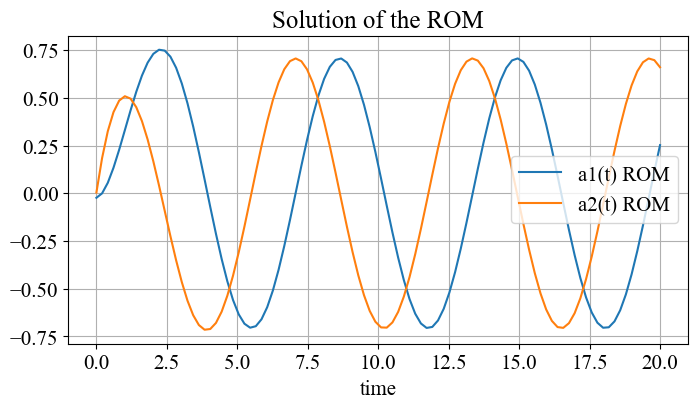

In [4]:
# let's take only the first two modes (which, in this case, is the entire system)
num_modes = 2

# initial conditions are the projections at t=0
initial_conditions = projection[0, :num_modes]

# define the ROM
def rom(state, t):
    a1, a2 = state
    da1dt = -a1 + np.sin(t)
    da2dt = -a2 + np.cos(t)
    return [da1dt, da2dt]

# solve ROM
solution_rom = odeint(rom, initial_conditions, t)

# plot results
plt.figure(figsize=(8,4))
plt.plot(t, solution_rom[:, 0], label='a1(t) ROM')
plt.plot(t, solution_rom[:, 1], label='a2(t) ROM')
plt.xlabel('time')
plt.legend()
plt.grid(True)
plt.title('Solution of the ROM')
plt.show()


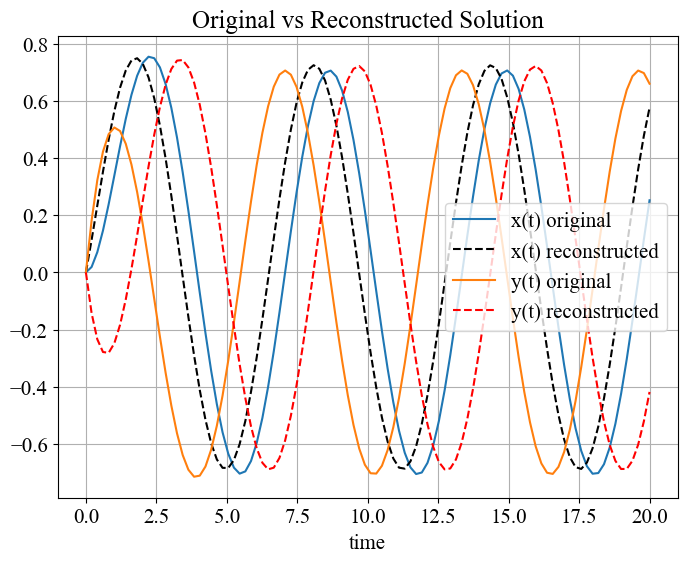

In [5]:
# Reconstruct the original state from the ROM solution
reconstruction = np.dot(solution_rom, eigvecs.T[:num_modes, :]) + mean

# plot the original x and y along with the reconstructed x and y
plt.figure(figsize=(8,6))
plt.plot(t, x, label='x(t) original')
plt.plot(t, reconstruction[:, 0], 'k--', label='x(t) reconstructed')
plt.plot(t, y, label='y(t) original')
plt.plot(t, reconstruction[:, 1], 'r--', label='y(t) reconstructed')
plt.xlabel('time')
plt.legend()
plt.grid(True)
plt.title('Original vs Reconstructed Solution')
plt.show()


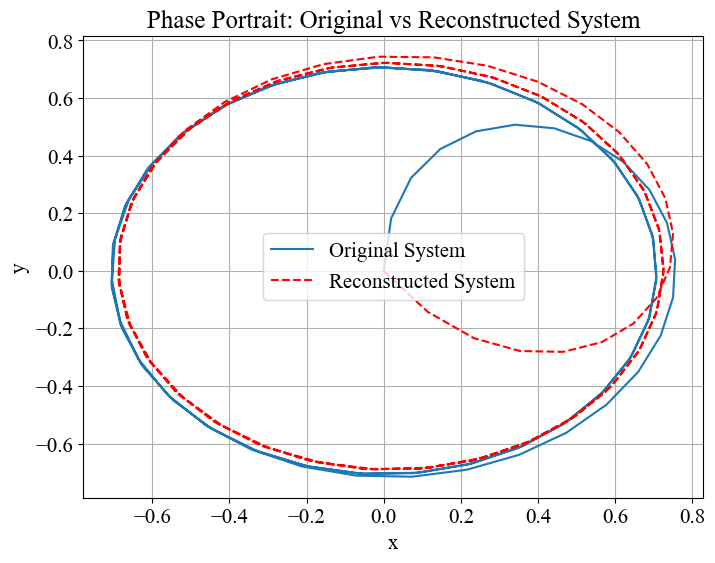

In [6]:
plt.figure(figsize=(8,6))
plt.plot(x, y, label='Original System')
plt.plot(reconstruction[:, 0], reconstruction[:, 1], 'r--', label='Reconstructed System')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.title('Phase Portrait: Original vs Reconstructed System')
plt.show()
